In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data=pd.read_csv('/content/kc_house_data.csv')

In [ ]:
data = pd.DataFrame({
    'LotFrontage': [80, 85, np.nan, 75],
    'LotArea': [8000, 9600, 8500, np.nan],
    'OverallQual': [7, 6, 8, 5],
    'YearBuilt': [2001, 1995, 2000, 1998],
    'SalePrice': [300000, 250000, 400000, 200000],
    'Unnamed': [1, 2, 3, 4]  # Column to drop
})

print("Original DataFrame:")
print(data)

data = data.drop('Unnamed', axis=1)

mean = data.mean()
data = data.fillna(mean)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nProcessed DataFrame:")
print(data.head())

Original DataFrame:
   LotFrontage  LotArea  OverallQual  YearBuilt  SalePrice  Unnamed
0         80.0   8000.0            7       2001     300000        1
1         85.0   9600.0            6       1995     250000        2
2          NaN   8500.0            8       2000     400000        3
3         75.0      NaN            5       1998     200000        4

Processed DataFrame:
   LotFrontage  LotArea  OverallQual  YearBuilt  SalePrice
0         80.0   8000.0            7       2001     300000
1         85.0   9600.0            6       1995     250000
2         80.0   8500.0            8       2000     400000
3         75.0   8700.0            5       1998     200000


In [ ]:
data.head(7)

,LotFrontage,LotArea,OverallQual,YearBuilt,SalePrice
0,80.0,8000.0,7,2001,300000
1,85.0,9600.0,6,1995,250000
2,80.0,8500.0,8,2000,400000
3,75.0,8700.0,5,1998,200000


In [ ]:
data = pd.DataFrame({
    'LotFrontage': [80, 85, np.nan, 75],
    'LotArea': [8000, 9600, 8500, np.nan],
    'OverallQual': [7, 6, 8, 5],
    'YearBuilt': [2001, 1995, 2000, 1998],
    'SalePrice': [300000, 250000, 400000, 200000]
})
data_array = data.values
y = data_array[:, -1]
x = data_array[:, :-1]

one = np.ones((x.shape[0], 1))
x = np.concatenate((one, x), axis=1)
split_ratio = 0.9
split_index = int(split_ratio * len(x))

X_train = x[:split_index]
y_train = y[:split_index]
X_test = x[split_index:]
y_test = y[split_index:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3, 5)
y_train shape: (3,)
X_test shape: (1, 5)
y_test shape: (1,)


In [ ]:
features=['sqft_living','bedroom']

In [ ]:
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [10, 20, 30, 40, 50],
    'price': [100, 200, 300, 400, 500]
})
features = ['feature1', 'feature2']
x = data[features]
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (4, 2)
x_test shape: (1, 2)
y_train shape: (4,)
y_test shape: (1,)


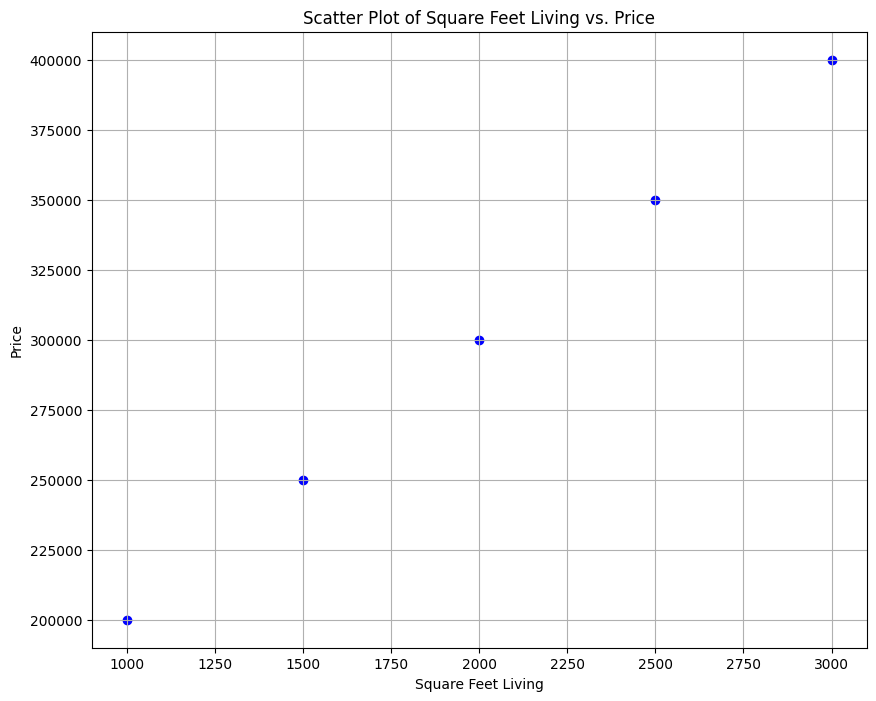

In [ ]:
data = pd.DataFrame({
    'sqft_living': [1000, 1500, 2000, 2500, 3000],
    'price': [200000, 250000, 300000, 350000, 400000]
})
x = data[['sqft_living']]
y = data['price']
plt.figure(figsize=(10, 8))
plt.scatter(x['sqft_living'], y, color='blue')
plt.xlabel('Square Feet Living')
plt.ylabel('Price')
plt.title('Scatter Plot of Square Feet Living vs. Price')
plt.grid(True)
plt.show()

In [ ]:
features = ['bias'] + ['feature1', 'feature2']
x_train_df = pd.DataFrame(x_train, columns=features)
x_test_df = pd.DataFrame(x_test, columns=features)
print("x_train_df:")
print(x_train_df.head())
print("\nx_test_df:")
print(x_test_df.head())

x_train_df:
   bias  feature1  feature2
4   NaN         5        50
2   NaN         3        30
0   NaN         1        10
3   NaN         4        40

x_test_df:
   bias  feature1  feature2
1   NaN         2        20


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error', (mse))

Mean Squared Error 1.2924697071141057e-26


In [ ]:
new_house = [[2000, 4]]
predicted_price = model.predict(new_house)
print(f"Predicted price for new house: {predicted_price[0]}")

Predicted price for new house: 2019.801980198021
